<a href="https://colab.research.google.com/github/Akiyoshi-Yagi/deepLearning/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#回帰分析

In [2]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()
# print(boston)
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["PRICE"] = boston["target"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(boston.data, boston.target,random_state=0)
print(x_train)

[[1.9133e-01 2.2000e+01 5.8600e+00 ... 1.9100e+01 3.8913e+02 1.8460e+01]
 [1.0328e-01 2.5000e+01 5.1300e+00 ... 1.9700e+01 3.9690e+02 9.2200e+00]
 [1.0469e-01 4.0000e+01 6.4100e+00 ... 1.7600e+01 3.8925e+02 6.0500e+00]
 ...
 [1.5098e-01 0.0000e+00 1.0010e+01 ... 1.7800e+01 3.9451e+02 1.0300e+01]
 [2.2927e-01 0.0000e+00 6.9100e+00 ... 1.7900e+01 3.9274e+02 1.8800e+01]
 [1.3914e-01 0.0000e+00 4.0500e+00 ... 1.6600e+01 3.9690e+02 1.4690e+01]]


In [5]:
#単回帰
from sklearn import linear_model

x_rm_train = x_train[:,[5]]
x_rm_test = x_test[:,[5]]

model = linear_model.LinearRegression()
model.fit(x_rm_train,t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
a = model.coef_
b = model.intercept_

print(model.coef_, model.intercept_)
# print(x_rm_train)

[9.31294923] -36.180992646339206


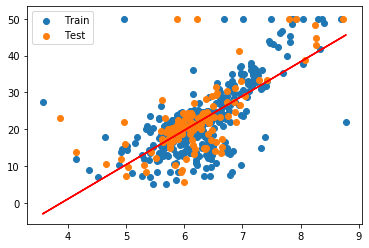

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x_rm_train,t_train,label="Train")
plt.scatter(x_rm_test,t_test,label="Test")

y = a*x_rm_train + b
plt.plot(x_rm_train, y,c="red")

plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

y_train = model.predict(x_rm_train)
mse_train = mean_squared_error(t_train, y_train)
print(mse_train)
print("----------")

y_test = model.predict(x_rm_test)
mse_test = mean_squared_error(t_test, y_test)
print(mse_test)

43.71870658739849
----------
43.472041677202206


In [9]:
##重回帰分析
model = linear_model.LinearRegression()

model.fit(x_train, t_train)#単回帰と同じ手順



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
a_df = pd.DataFrame(boston.feature_names, columns = ["Exp"])
a_df["a"] = pd.Series(model.coef_)
# a_df["a"] =  model.coef_
a_df

,Exp,a
0,CRIM,-0.117735
1,ZN,0.044017
2,INDUS,-0.005768
3,CHAS,2.393416
4,NOX,-15.589421
5,RM,3.768968
6,AGE,-0.007035
7,DIS,-1.434956
8,RAD,0.240081
9,TAX,-0.011297


In [20]:
#平均二乗誤差（MSE）
y_train = model.predict(x_train)
mse_train = mean_squared_error(t_train, y_train)
print(mse_train)
y_test = model.predict(x_test)
mse_test = mean_squared_error(t_test, y_test)
print(mse_test)



19.640519427908046
29.78224509230252
